In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import Pipeline
from sklearn.pipeline import Pipeline
#--------------------------------------------------
# All model import
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
#--------------------------------------------------
# All Preprocessing modules
from sklearn.feature_selection import SelectPercentile
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
#--------------------------------------------------
# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import r2_score

# Overview of sklearn

Data Transformation Using Scikit-learn<br>
https://scikit-learn.org/stable/data_transforms.html

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Output variables
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# name of columns
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.data_module

'sklearn.datasets.data'

In [ ]:
data.filename

'breast_cancer.csv'

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.corr(method='pearson')['mean perimeter']['mean radius']

0.9978552814938109

In [ ]:
df.shape

(569, 31)

In [ ]:
# 0 == Begning
# 1 = mMlignant
begnine = df[df['target'] == 0] # begnine
malignant = df[df['target'] == 1] # malignant
print(f'Begnine cases : {begnine.shape[0]}')
print(f'Malignant cases : {malignant.shape[0]}')

Begnine cases : 212
Malignant cases : 357


In [ ]:
from sklearn.datasets import fetch_california_housing
house_data = fetch_california_housing()

house_df = pd.DataFrame(house_data.data, columns = house_data.feature_names)
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_df.shape

(20640, 8)

In [ ]:
house_data.target[:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

In [ ]:
house_data.target_names

['MedHouseVal']

In [ ]:
w1=5
w0=6
n=200

X=10*np.random.rand(n, )

y=w0+w1+X+np.random.randn(n, )

print("Shape of feature matrix",X.shape)
print("Shape of label vector",y.shape)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=36)

print("shape of training feature matrix", X_train.shape)

print("shape of test feature matrix",X_test.shape)
print("shape of training label",y_train.shape)

print("shape of test label",y_test.shape)

Shape of feature matrix (200,)
Shape of label vector (200,)
shape of training feature matrix (160,)
shape of test feature matrix (40,)
shape of training label (160,)
shape of test label (40,)


# EDA using scikit

### 1) Feature Extraction

1. Dictionary vectorizer : sklearn.feature_extraction has DIctVectorizer()

In [ ]:
import sklearn.feature_extraction as fextract
df = fextract.DictVectorizer(sparse=False)

In [ ]:
data = [{'age':4, 'height':96.0},
        {'age':1, 'height':90.0},
        {'age':3, 'height':89.0},
        {'age':2, 'height':100.0}]
df = fextract.DictVectorizer(sparse=False)
transformed_feature = df.fit_transform(data)

In [ ]:
transformed_feature

array([[  4.,  96.],
       [  1.,  90.],
       [  3.,  89.],
       [  2., 100.]])

In [ ]:
from sklearn.impute import SimpleImputer
X = np.array([[7, 1], [np.nan, 8], [2, np.nan], [9, 6]])
print(f'X is :\n {X}')
imputer = SimpleImputer(strategy='mean')
print(f'X after imputing :\n {imputer.fit_transform(X)}')

X is :
 [[ 7.  1.]
 [nan  8.]
 [ 2. nan]
 [ 9.  6.]]
X after imputing :
 [[7. 1.]
 [6. 8.]
 [2. 5.]
 [9. 6.]]


In [ ]:
from sklearn.impute import KNNImputer
X = np.array([[1,2,np.nan], [3,4,3], [np.nan, 6, 5], [8, 8, 7]])
print(f'X is :\n {X}')
KNN = KNNImputer(n_neighbors=2, weights='uniform')
print(f'X after imputing :\n {KNN.fit_transform(X)}')

X is :
 [[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]
X after imputing :
 [[1.  2.  4. ]
 [3.  4.  3. ]
 [5.5 6.  5. ]
 [8.  8.  7. ]]


In [ ]:
from pandas.core.common import random_state
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
arr = np.random.randint(100, 200, [5, 1])
print(f'Unscaled arr :\n {arr}')
scaler = StandardScaler()
print(f'Scaled arr :\n{scaler.fit_transform(arr)}')

Unscaled arr :
 [[144]
 [147]
 [164]
 [167]
 [167]]
Scaled arr :
[[-1.36001851]
 [-1.06436231]
 [ 0.61102281]
 [ 0.90667901]
 [ 0.90667901]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
np.random.seed(0)
arr = np.random.randint(100, 200, [5, 1])
print(f'Unscaled arr :\n {arr}')
scaler = MinMaxScaler()
print(f'Scaled arr :\n{scaler.fit_transform(arr)}')

Unscaled arr :
 [[144]
 [147]
 [164]
 [167]
 [167]]
Scaled arr :
[[0.        ]
 [0.13043478]
 [0.86956522]
 [1.        ]
 [1.        ]]


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
np.random.seed(0)
arr = np.random.randint(-100, 200, [5, 1])
print(f'Unscaled arr :\n {arr}')
scaler = MaxAbsScaler()
print(f'Scaled arr :\n{scaler.fit_transform(arr)}')

Unscaled arr :
 [[ 72]
 [-53]
 [ 17]
 [ 92]
 [151]]
Scaled arr :
[[ 0.47682119]
 [-0.35099338]
 [ 0.11258278]
 [ 0.60927152]
 [ 1.        ]]


In [ ]:
from sklearn.preprocessing import FunctionTransformer
np.random.seed(0)
arr = np.random.randint(1, 100, [4, 2])
print(f'Unscaled arr :\n {arr}')
transform = FunctionTransformer(np.log2)
print(f'Scaled arr :\n{transform.fit_transform(arr)}')

Unscaled arr :
 [[45 48]
 [65 68]
 [68 10]
 [84 22]]
Scaled arr :
[[5.4918531  5.5849625 ]
 [6.02236781 6.08746284]
 [6.08746284 3.32192809]
 [6.39231742 4.45943162]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)
arr = np.random.randint(1, 100, [1, 2])
print(f'Unscaled arr :\n {arr}')
polyfeatures = PolynomialFeatures(degree=2)
print(f'Scaled arr :\n{polyfeatures.fit_transform(arr)}')

Unscaled arr :
 [[45 48]]
Scaled arr :
[[1.000e+00 4.500e+01 4.800e+01 2.025e+03 2.160e+03 2.304e+03]]


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
arr = np.array([[0.0], [0.125], [0.25], [0.375], [0.5], [0.675], [0.75], [0.875], [1.0]])
print(f'Unscaled arr :\n {arr}')
bins = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
print(f'Scaled arr :\n{bins.fit_transform(arr)}')

Unscaled arr :
 [[0.   ]
 [0.125]
 [0.25 ]
 [0.375]
 [0.5  ]
 [0.675]
 [0.75 ]
 [0.875]
 [1.   ]]
Scaled arr :
[[0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]]


In [ ]:
a = np.array([[1], [2], [3]])
ft = FunctionTransformer(np.mean)
ft.fit_transform(a)

2.0

### Preprocessing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width','label']
data.shape

(149, 5)

In [ ]:
X = np.array(data[['sepal length', 'sepal width', 'petal length', 'petal width']])

In [ ]:
# Apply polynomial 
X = np.array(data[['sepal length', 'sepal width', 'petal length', 'petal width']])
poly = PolynomialFeatures(degree=2)
data_new = poly.fit_transform(X)
data_new.shape

(149, 15)

### Categorical Transformations

**One Hot Encoder**<br>
Encodes categorical variables or lables as one-hot array.

Only one variable is marked as 1 and rest are 0. A sparse matrix is created.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
arr = np.array([[1], [3], [1], [2]])
print(f'Array before one hot encoding : \n{arr}')
one_hot = OneHotEncoder()
one_hot_fit = one_hot.fit_transform(arr).toarray()
print(f'Array after one hot encoding : \n{one_hot_fit}')

Array before one hot encoding : 
[[1]
 [3]
 [1]
 [2]]
Array after one hot encoding : 
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


**LabelEncoder**<br>
Encodes target with labels with values between 0 and K-1<br>
where K is number of distinct values.<br>
1 encoded as 0, 2 as 1, 6 as 2 and 8 as 3

In [ ]:
from sklearn.preprocessing import LabelEncoder
arr = np.array([[1], [2], [6], [1], [8], [6]])
print(f'Array before one encoding : \n{arr}')
label = LabelEncoder()
print(f'Array after one hot encoding : \n{label.fit_transform(arr)}')

Array before one encoding : 
[[1]
 [2]
 [6]
 [1]
 [8]
 [6]]
Array after one hot encoding : 
[0 1 2 0 3 2]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Ordinal Encoder**<br>
Encodes target with labels with values between 0 and K-1
where K is number of distinct values.<br>
It can also operate on multidimentional data.


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
arr = np.array([[1, 'male'], [2,'female'], [6, 'female'], [1, 'male'], [8, 'male'], [6, 'female']])
print(f'Array before one encoding : \n{arr}')
label = OrdinalEncoder()
print(f'Array after one hot encoding : \n{label.fit_transform(arr)}')

Array before one encoding : 
[['1' 'male']
 ['2' 'female']
 ['6' 'female']
 ['1' 'male']
 ['8' 'male']
 ['6' 'female']]
Array after one hot encoding : 
[[0. 1.]
 [1. 0.]
 [2. 0.]
 [0. 1.]
 [3. 1.]
 [2. 0.]]


### Filters
1. Filter based
2. Wrapper Based

Can be accessed by sklearn.feature_selection

In [ ]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold
x = np.array([[1,1,1], [1,3,4], [1,2,4]])
var = VarianceThreshold()
print(x)
print("After variance threshold applied:")
print(var.fit_transform(x))

[[1 1 1]
 [1 3 4]
 [1 2 4]]
After variance threshold applied:
[[1 1]
 [3 4]
 [2 4]]


In [ ]:
print(f'Variance of column {x[:, 0]} is : {np.var(x[:, 0])}')
print(f'Variance of column {x[:, 1]} is : {np.var(x[:, 1])}')
print(f'Variance of column {x[:, 2]} is : {np.var(x[:, 2])}')

Variance of column [1 1 1] is : 0.0
Variance of column [1 3 2] is : 0.6666666666666666
Variance of column [1 4 4] is : 2.0


In [ ]:
# Removes columns/features below a given threshold variance
var1 = VarianceThreshold(0.65)
var1.fit_transform(x)

array([[1, 1],
       [3, 4],
       [2, 4]])

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)
print(f'Size of origiinal data: {X.shape}')
X_new = SelectPercentile(mutual_info_regression, percentile=10).fit_transform(X, y)
print(f'Shape of new data:{X_new.shape}')

Size of origiinal data: (20640, 8)
Shape of new data:(20640, 1)


### Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer
X = np.array([[20.0, 'male'], [11.2,'female'], [15.6, 'female'], [13.0, 'male'], [18.6, 'male'], [16.4, 'female']])
column_trans = ColumnTransformer(
    [('ageScaler', MaxAbsScaler(), [0]),
     ('genderEncoder', OneHotEncoder(dtype='int'), [1])],
     remainder='drop', verbose_feature_names_out=True)

column_trans.fit_transform(X)

array([[1.  , 0.  , 1.  ],
       [0.56, 1.  , 0.  ],
       [0.78, 1.  , 0.  ],
       [0.65, 0.  , 1.  ],
       [0.93, 0.  , 1.  ],
       [0.82, 1.  , 0.  ]])

### Transforming target Regressor

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

tt = TransformedTargetRegressor(regressor=LinearRegression(),
                                func = np.log, inverse_func=np.exp)

X = np.arange(5).reshape(-1, 1)
y = np.exp(2*X).reshape(-1)
tt.fit(X, y)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [ ]:
tt.get_params()

{'check_inverse': True,
 'func': <ufunc 'log'>,
 'inverse_func': <ufunc 'exp'>,
 'regressor': LinearRegression(),
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__n_jobs': None,
 'regressor__normalize': 'deprecated',
 'regressor__positive': False,
 'transformer': None}

# Linear regression using scikit

Model can be trained in two ways:
1. Normal Equation method :
    - To use normal equation method we import ```LinearRegressiom``` from ```sklearn.linear_model```.
2. Iterative optimization : 
    - To use iterative method like gradient descent we import ```SGDRegressor``` from ```sklearn.linear_model```.

Then when we instantiate object of suitable regression estimator we call ```.fit()``` method and pass $X\_train$ ans $y\_train$ as parameters.

<strong>SGDRegressor Estimator</strong><br>
- Implements stochastic gradient descent.
- Used for training large data.($\ge 10k $&nbsp;$samples$).
- Can control hyperparameters with ease.

![image.jpg](https://drive.google.com/uc?export=view&id=1L6cRreEqom-FqDq87H5SGL8TxPiYi2eN)

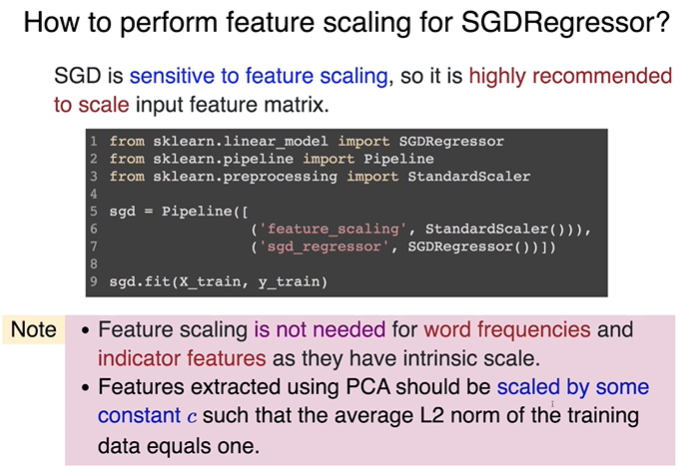

- To shuffle training data in SDG regressor use $\color{green}{\text{shuffle=True}}$.
- ```learning_rate``` is another paramater that we can tweek.There three types:
    - learning_rate = constant
    - learning_rate = invscaling
    - learning_rate = adaptive<br>
The default parameter is - ```learning_rate = 'invscaling'```
- For ```invscaling``` we have $eta0=10^{-2}$ and $power\_t=0.25$ as default parametres and after evert iteration learning rate is decided by :
$eta = \frac{eta0}{t^{i}}$, where i=power_t.<br>
This is done to smothen the decrease in weights.

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
X = df[data.feature_names]
df['target'] = data.target
y = data.target
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [ ]:
X.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=False, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(16512, 8)
(16512,)
(4128, 8)
(4128,)


In [ ]:
regression_pipeline = Pipeline([('scaler', StandardScaler()),
                                 ('linear_reg', LinearRegression())])

regression_pipeline.fit(X_train, y_train)

y_pred = regression_pipeline.predict(X_test)

print("R2 score:", regression_pipeline.score(X_test, y_test))
print("\nMean abs error", mean_absolute_error(y_test, y_pred))

# Cross validation
from sklearn.model_selection import cross_val_score

score = cross_val_score(regression_pipeline[-1], X, y, cv=5)
print(score)

R2 score: 0.6605140591531992

Mean abs error 0.5168526993787042
[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]


In [ ]:
reg = Pipeline([
                ('scaler', StandardScaler()),
                ('sgd', SGDRegressor(loss='squared_error',
                                     max_iter=1000,
                                     early_stopping=True,
                                     tol=1e-3,
                                     n_iter_no_change=10,
                                     average=True))
                ])

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(f'coefficients : {reg[-1].coef_}')

print("\nR2 score:", reg.score(X_test, y_test))

print("\nMean abs error", mean_absolute_error(y_test, y_pred))


In [ ]:
# Setting stopping criterion
linear_regressor = SGDRegressor(loss='squared_error', 
                                max_iter = 500,
                                tol = 1e-3,
                                n_iter_no_change=5, 
                                learning_rate = 'adaptive',
                                eta0 = 1e-2)

# The program stops when there is no change in loss by 0.001
# after 5 iterations.
pipe = Pipeline([('scaler', StandardScaler()),
                 ('sgd', SGDRegressor(loss='squared_error', 
                                max_iter = 500,
                                tol = 1e-3,
                                n_iter_no_change=5, 
                                learning_rate = 'adaptive',
                                eta0 = 1e-2))])

To know number of iterations and number of weight updates

In [ ]:
eta0 = 1e-3
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()),
                         ('SGD', SGDRegressor(max_iter=1000, tol = np.infty,
                                              warm_start=True, eta0 = eta0,
                                              random_state=42))])

#  Number of iterations
# sgd_pipeline[-1].n_iter_

#  Number of weight update
# sgd_pipeline[-1].t_

In [ ]:
regressor = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred.shape

In [ ]:
np.median(y_test)

Intercept and Coefficients

In [ ]:
print(f'Weights are :\n{regressor[-1].coef_}')
print(f'Intercept is :\n{regressor[-1].intercept_}')

$R^2$ score 

In [ ]:
pipe.score(X_test, y_test)

In [ ]:
r2_score(y_test, y_pred)

Mean squared error

In [ ]:
eval_score = mean_absolute_error(y_test, y_pred)
eval_score

```mean_squared_log_error``` is used for population that grows on exponential scale.

The worst case error on the train set is given by ```max_error```. This cannot be used for multi-output regression

In [ ]:
transformer = FunctionTransformer(np.log1p)
X = np.array([[0, 9], [7, 8]])
transformer.transform(X)

# Mock Practice

In [128]:
from sklearn.datasets import fetch_california_housing

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape

(16512, 8)

In [ ]:
from sklearn.dummy import DummyRegressor
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)
y_pred = dummy_mean.predict(X_test)
r2_score(y_test, y_pred)

-0.0003120049888716281

In [ ]:
pipe = Pipeline(
    [('min_max', MinMaxScaler()),
      ('sgd', SGDRegressor())])


pipe.fit(X_test, y_test)

y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print(f'Test Error : {mean_absolute_error(y_test, y_test_pred)}')
print(f'Test Error : {mean_absolute_error(y_train, y_train_pred)}')


Test Error : 0.5761325988845172
Test Error : 0.5862023083254831


In [ ]:
linear_reg = LinearRegression()
cross_val_score(linear_reg, X, y, cv=5)

array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406])

Diabetese Dataset

In [ ]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
index = load_diabetes()['feature_names'].index('s3')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=10)

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('linreg', LinearRegression())])
pipeline.fit(X_train, y_train)

print(pipeline.score(X_test, y_test))

0.5341962544929233


In [ ]:
pipeline[-1].coef_

array([ -0.18524015, -10.74395358,  23.97068421,  15.44649018,
       -33.63629412,  19.07747445,   3.87751116,  10.51831194,
        34.15440847,   1.91362494])

In [ ]:
pipeline[-1].coef_[index]

3.8775111593962004

Use K fold

In [ ]:
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5, random_state=10, shuffle=True)
score = cross_val_score(pipeline[-1], X, y, cv=kFold)
score

array([0.53419625, 0.36395778, 0.41205671, 0.59555714, 0.49929309])

Using Shuffle Split

In [ ]:
# using shuffle split
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2)
score = cross_val_score(pipeline[-1], X, y, cv=shuffle_split)
score

array([0.53304867, 0.4303164 , 0.47071806, 0.41370933, 0.43493177])

Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = [
        {'poly_deg': [2, 3, 4, 5, 6]}]
pipeline = Pipeline(steps=
                    [
                     ('poly', PolynomialFeatures()),
                     ('sgd', SGDRegressor())
                    ])

grid_search = GridSearchCV(pipeline, grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train.reshape(-1, 1), y_train)

# Classification

In [3]:
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import load_wine

## Wine Classification

In [ ]:
wine_data = load_wine(as_frame=True)
X = wine_data.data
y = load_wine().target

# Shuffle data
# wine_df = wine_df.sample(frac=1).reset_index(drop=True)

X.head()     

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X.shape

(178, 13)

In [ ]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


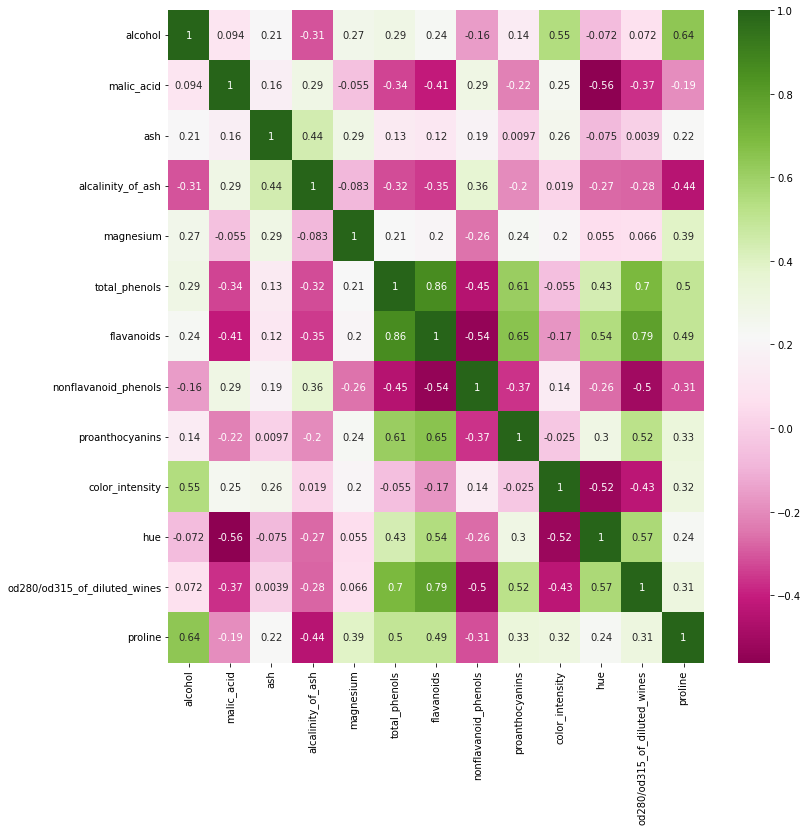

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(X.corr(), annot=True, cmap='PiYG')
plt.show()

In [ ]:
X = X.drop(['ash'], axis=1)

In [ ]:
X.head(2)

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


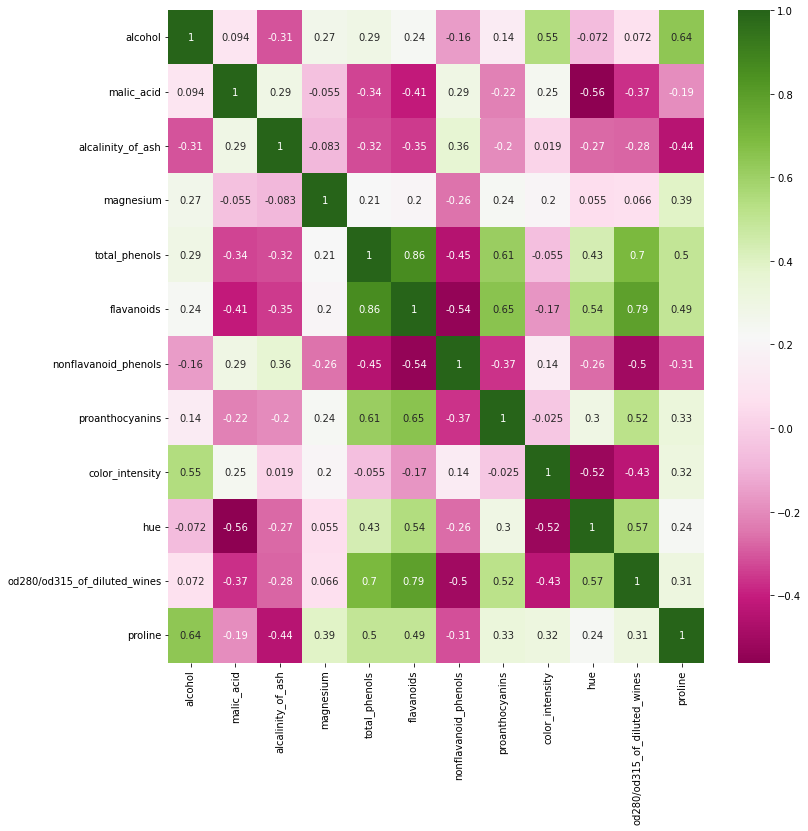

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(X.corr(), annot=True, cmap='PiYG')
plt.show()

In [ ]:
X.describe()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 12)
(54, 12)
(124,)
(54,)


In [ ]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test =  scal.transform(X_test)

In [ ]:
ridge = RidgeClassifier(alpha=100, random_state=42)

ridge.fit(X_train, y_train)

RidgeClassifier(alpha=100, random_state=42)

In [ ]:
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print(f'Test Error : {ridge.score(X_train,y_train)}')
# print(f'Test Error : {ridge.score(y_train, y_train_pred)}')

Test Error : 0.9758064516129032


## Digit Classifier

In [82]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import Perceptron

Handwritten digit classifier<br>
Initially we do One Vs All classification.<br>
That is we will predict a digit id $0$ or not.

In [83]:
# Returns pandas dataframe
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

COnvert X and y into numpy array

In [84]:
X = X.to_numpy()
y = y.to_numpy()

In [85]:
target_names = np.unique(y)
print(f'Number of samples : {X.shape[0]}')
print(f'Number of features : {X.shape[1]}')
print(f'Range of features : {np.min(X)} - {np.max(X)}')
print(f'Number of classes : {len(target_names)}')
print(f'Labels : {target_names}')

Number of samples : 70000
Number of features : 784
Range of features : 0.0 - 255.0
Number of classes : 10
Labels : ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


As features range from $0$ to $255$ so we will normalize the features and bring sown the features in $0$ to $1$.

In [86]:
X = MinMaxScaler().fit_transform(X)
print(f'Range of features : {np.min(X)} - {np.max(X)}')

Range of features : 0.0 - 1.0


**Data Visualization**<br>
Each image is $28$ X $28$ pixels in dimentions. In the dataset these are stored in the form of an array consisting $784$ entries with each entry in the matrix corresponding to the value of corresponding pixel.

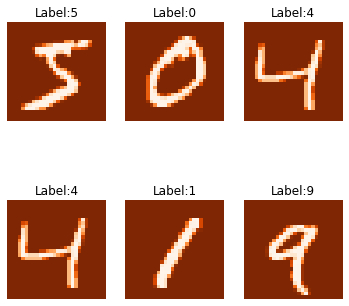

In [87]:
num_images = 6
factor = 2
fig, ax = plt.subplots(nrows=factor, ncols = factor+1, figsize=(6, 6))

idx_offset = 0 # plot images starting from starting offset
for i in range(factor):
    index = idx_offset + i*factor
    for j in range(factor+1):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='Oranges_r')
        ax[i, j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i, j].set_axis_off()

Splitting of data

In [88]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


**Modify labels**
- Since the original label vector contains 10 classes, we need to modify the number of classes to 2.

- Therefore, the label 0 will be changed 1 and all the other labels (1-9) will be changed to -1.

- We will name the label vectors as ```y_train_0``` and ```y_test_0```.

In [90]:
# initialize new variable names with all -1
y_train_0 = -1*np.ones(len(y_train))
y_test_0 = -1*np.ones(len(y_test))

# find indices of digit 0 image
indx_0 = np.where(y_train=='0') 

# remember original labels are of type str not int, so use those indices to modify y_train_0 & y_test_0

y_train_0[indx_0] = 1
indx_0 = np.where(y_test =='0')
y_test_0[indx_0] = 1

Again display images to check whether labels have changed

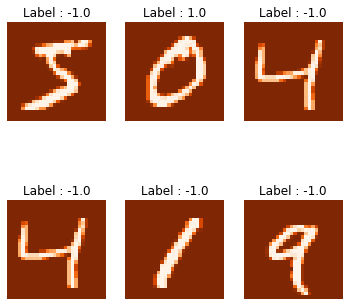

In [91]:
num_images = 6
factor = 2

fig,ax = plt.subplots(nrows=factor, ncols=factor+1,figsize=(6,6))
# take "num_images" starting from the index "idx_offset"
idx_offset = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor+1):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap='Oranges_r')
        ax[i,j].set_title('Label : {0}'.format(str(y_train_0[index+j])))
        ax[i,j].set_axis_off()

**Perceptron Model**

1. **Training data**
- consists of features and labels $(X, y)$
- $y$ is a discrete number.

2. **Model** : 

\begin{align}
        h_w : y &= g(w^T x)\\
        &= g(w_0 + w_1 x_1 + ....+w_m x_m)
    \end{align}
where,<br>
- $w$ is weight vector
- $g(.)$ is the signum function.

3. **Loss Function**:


\begin{align}
    \text e^{(i)}& =\begin{cases} 0 , \ \ \text { if} \ \ {\hat y}^{(i)} = y^{(i)} \\ -\mathbf {w^Tx^{(i)}}y^{(i)}, \text { otherwise} (i.e. {\hat y}^{(i)} \ne y^{(i)})\end{cases}
\end{align}

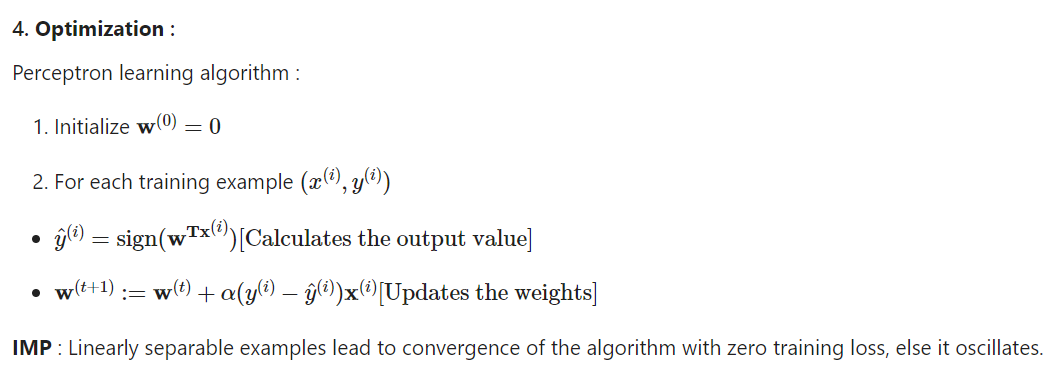

**Parameters of Perceptron Loss**

- Let's quickly take a look into the important parameters of the Perceptron()<br>
```class sklearn.linear_model.Perceptron (*,penalty=None, alpha = 0.0001, l1_ratio=0.15, fit_intercept = True, max_iter=1000,tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,class_weight=None, warm_start=False)```.

- We need not to pay attention to all the arguments and their default values.

- Internally, the API uses the perceptron loss (i.e. it calls Hinge(0,0), where 0.0 is a threshold) and uses SGD to update the weights.

- The other way of deploying perceptron is to use the general ```linear_model.SGDClassifier``` with ```loss='perceptron'```

- The above loss is termed as hard Hinge-loss (as scores pass through the sign function) and hence we can't use SGD.

- Whereas, sklearn implements hinge-loss with the following definition: $max(0, - w(x^i)y^i)$and by default calls SGD to minimize the loss.

**Training and fitting of Model**<br>


In [92]:
bin_clf = Perceptron(max_iter=100, random_state=1729)

In [93]:
bin_clf.fit(X_train, y_train_0)

print(f'Weight dimentions : {bin_clf.coef_.shape}')
print(f'Bias : {bin_clf.intercept_}')
print(f'Loss function : {bin_clf.loss_function_}')

Weight dimentions : (1, 784)
Bias : [-108.]
Loss function : <sklearn.linear_model._sgd_fast.Hinge object at 0x7fd84c2228f0>


Make predictions of training set and check accuracy.

In [94]:
y_hat_train_0 = bin_clf.predict(X_train)
print(f'Training accuracy : {bin_clf.score(X_train, y_train_0)}')

Training accuracy : 0.99095


Let's check test accuracy

In [95]:
print(f'test accuracy : {bin_clf.score(X_test, y_test_0)}')

test accuracy : 0.989


Display Predictions

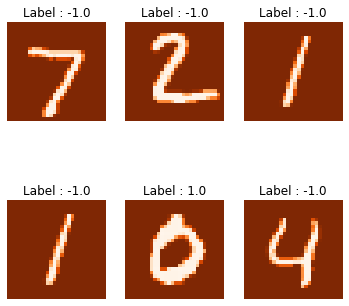

In [96]:
y_hat_test_0 = bin_clf.predict(X_test)

num_images = 6
factor = 2

fig,ax = plt.subplots(nrows=factor, ncols=factor+1,figsize=(6,6))
# take "num_images" starting from the index "idx_offset"
idx_offset = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor+1):
        ax[i,j].imshow(X_test[index+j].reshape(28,28), cmap='Oranges_r')
        ax[i,j].set_title('Label : {0}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

Only display correct predictions

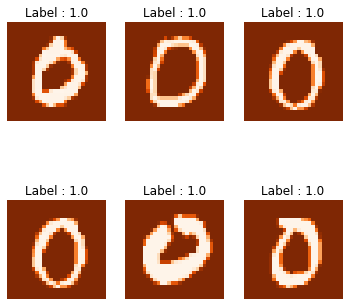

In [97]:
index_0 = np.where(y_test_0 == 1)

zeroImage = X_test[index_0[0]]
zeroLabel = y_hat_test_0[index_0[0]]

num_images = 6
factor = 2

fig,ax = plt.subplots(nrows=factor, ncols=factor+1,figsize=(6,6))
# take "num_images" starting from the index "idx_offset"
idx_offset = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor+1):
        ax[i,j].imshow(zeroImage[index+j].reshape(28,28), cmap='Oranges_r')
        ax[i,j].set_title('Label : {0}'.format(str(zeroLabel[index+j])))
        ax[i,j].set_axis_off()

Get number of misclassified images

In [98]:
num_misClassified = np.count_nonzero(zeroLabel == -1)

num_correctClassified = len(zeroLabel) - num_misClassified

accuracy = num_correctClassified/ len(zeroLabel)
print(accuracy)

0.9193877551020408


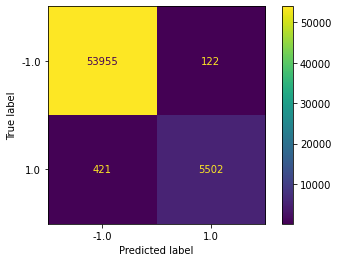

In [99]:
y_hat_train_0 = bin_clf.predict(X_train)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, 
                                        y_hat_train_0,
                                        values_format='.5g')

In [100]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



**Cross validation**<br>
We will apply cross validation in order to check whether our model predicted correct labels or not.

In [106]:
bin_clf = Perceptron(max_iter=100, random_state=1729)

scores = cross_validate(bin_clf, X_train, y_train_0, cv=5, 
                        scoring = ['precision', 'recall', 'f1'],
                        return_estimator=True)

for key in scores.keys():
    print(f'{key} : {scores[key]}')

fit_time : [1.17745471 2.37194896 2.10750079 1.39581656 1.79982924]
score_time : [0.07774043 0.0747118  0.07841539 0.06500983 0.07924438]
estimator : [Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729)]
test_precision : [0.95890411 0.98828125 0.95319149 0.95090439 0.96200345]
test_recall : [0.94594595 0.85472973 0.94514768 0.93164557 0.94008439]
test_f1 : [0.95238095 0.91666667 0.94915254 0.94117647 0.95091763]


In [111]:
# Print al cross validation results in a data freme
CV_df = pd.DataFrame(scores)
# CV_df.reset_index(inplace=True, drop=True)
CV_df

,fit_time,score_time,estimator,test_precision,test_recall,test_f1
0,1.177455,0.077740,"Perceptron(max_iter=100, random_state=1729)",0.958904,0.945946,0.952381
1,2.371949,0.074712,"Perceptron(max_iter=100, random_state=1729)",0.988281,0.854730,0.916667
2,2.107501,0.078415,"Perceptron(max_iter=100, random_state=1729)",0.953191,0.945148,0.949153
3,1.395817,0.065010,"Perceptron(max_iter=100, random_state=1729)",0.950904,0.931646,0.941176
4,1.799829,0.079244,"Perceptron(max_iter=100, random_state=1729)",0.962003,0.940084,0.950918


In [121]:
# Summarixe the mean and standard deviation of precision, recall and f1 score
CV_df[['test_precision', 'test_recall', 'test_f1']].describe()

,test_precision,test_recall,test_f1
count,5.000000,5.000000,5.000000
mean,0.962657,0.923511,0.942059
std,0.014990,0.038869,0.014840
min,0.950904,0.854730,0.916667
25%,0.953191,0.931646,0.941176
50%,0.958904,0.940084,0.949153
75%,0.962003,0.945148,0.950918
max,0.988281,0.945946,0.952381


Now let's plot confusion matrix from the extimator that we have obtained from cross validation

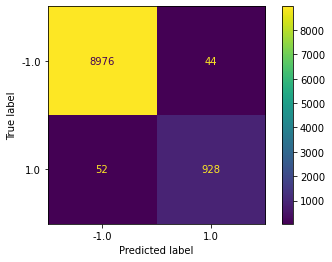

In [123]:
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(X_test)

cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test_0, y_hat_test_0, values_format='.5g')

**Precision recall trade off**<br>
We try to visualize the distribution of linear combination of weight vectors and feature vectors.<br>
Basically we plot the linear combination before applying non linear activation function.

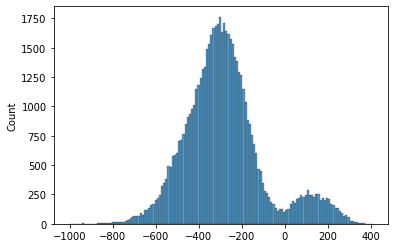

In [126]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train, y_train_0)

# get linear combination
y_score = bin_clf.decision_function(X_train)
sns.histplot(y_score)
plt.show()

The reason for so many negative values than the positives is : Class-Imbalance.

- Suppose threshold takes the value of -600, then all the samples having score greater than -600 is set to 1 ( +ve label ) and less than it is set to -1 ( -ve label ).

- Therefore, the number of False Positives will be increased. This will in turn reduce the precision score to a greater extent.

- On the otherhand, if the threshold takes the value of say 400, Then, the number of False negatives will be increase and hence the recall will reduce to a greater extent.